# Exam 1
# Author: Elias Nicolas
# Special Thanks: Oliver Child, Kenzo Yui, Madden Kline, Diego Cardenas, Colton Buxkemper

In [298]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

In [299]:
file_location = 'https://joannabieri.com/introdatascience/data/lego_sample.csv'
DF = pd.read_csv(file_location)

In [300]:
DF

,item_number,set_name,theme,pieces,price,amazon_price,year,ages,pages,minifigures,packaging,weight,unique_pieces,size
0,10859,My First Ladybird,DUPLO®,6,4.99,16.00,2018,Ages_1½-3,9,NaN,Box,NaN,5,Large
1,10860,My First Race Car,DUPLO®,6,4.99,9.45,2018,Ages_1½-3,9,NaN,Box,0.13Kg (0.29 lb),6,Large
2,10862,My First Celebration,DUPLO®,41,14.99,39.89,2018,Ages_1½-3,9,NaN,Box,NaN,18,Large
3,10864,Large Playground Brick Box,DUPLO®,71,49.99,56.69,2018,Ages_2-5,32,2.0,Plastic box,1.41Kg (3.11 lb),49,Large
4,10867,Farmers' Market,DUPLO®,26,19.99,36.99,2018,Ages_2-5,9,3.0,Box,NaN,18,Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,60251,Monster Truck,City,55,9.99,8.99,2020,Ages_5+,32,1.0,Box,0.14Kg (0.31 lb),34,Small
71,60252,Construction Bulldozer,City,126,19.99,15.99,2020,Ages_4+,84,2.0,Box,0.35Kg (0.78 lb),81,Small
72,60258,Tuning Workshop,City,897,99.99,99.99,2020,Ages_6+,389,7.0,Box,1.63Kg (3.58 lb),411,Small
73,60266,Ocean Exploration Ship,City,745,149.99,149.99,2020,Ages_7+,229,8.0,Box,2.28Kg (5.03 lb),314,Small


# Problem 1

## (a) How many variables and observations are in the data set?

In [412]:
obv = DF.shape[0]
var = DF.shape[1]

#print(f"There are {obv} observations in the dataset.")
#print(f"There are {var} variables in the dataset.")

print(obv)
print(var)

75
14


## There are 75 observations in the dataset.
## There are 14 variables in the dataset.

## (b) What are the names of all the variables?

In [302]:
var_names = DF.columns

#Classic print statement
#print(var_names)

#Shows it in a pretty table, resets index to start at 1 
var_name_DF = pd.DataFrame(var_names, columns = ['Variable_Names'])
var_name_DF.reset_index(drop=True, inplace=True)
var_name_DF.index +=1

var_name_DF['Data_Type'] = ['Numerical', 'Categorical','Categorical','Numerical','Numerical','Numerical','Categorical','Categorical','Numerical','Numerical','Categorical','Numerical','Numerical','Categorical']
var_name_DF

,Variable_Names,Data_Type
1,item_number,Numerical
2,set_name,Categorical
3,theme,Categorical
4,pieces,Numerical
5,price,Numerical
6,amazon_price,Numerical
7,year,Categorical
8,ages,Categorical
9,pages,Numerical
10,minifigures,Numerical


## (c) For each variable talk about whether you think that variable is Numerical or Categorical and what type of data it is.

**Price (Numerical - Continuous): This is the manufacturer's suggested retail price for the set, which can take any value within a range.**

**Amazon Price (Numerical - Continuous): This is the selling price of the set listed on Amazon, which can vary and take any value within a range.**

**Weight (Numerical - Continuous): This is the physical weight of the complete, packaged set, which can be any value within a range.**

**Item Number (Numerical - Discrete): This is a unique integer assigned to each set for identification purposes.**

**Pieces (Numerical - Discrete): This represents the total count of individual pieces, which is always a whole number.**

**Pages (Numerical - Discrete): This is the total page count of the instruction manual, which is always an integer.**

**Minifigures (Numerical - Discrete): This represents the total count of minifigures included in the set, which is a whole number.**

**Unique Pieces (Numerical - Discrete): This is the count of distinct element types within the set, which is always a whole number.**

**Year (Categorical - Ordinal): This indicates the release year, which has a clear chronological order.**

**Ages (Categorical - Ordinal): This groups sets into categories based on the recommended age range, which has a natural progression from younger to older.**

**Size (Categorical - Ordinal): This groups sets into predefined size categories, which have a natural order from small to large.**

**Set Name (Categorical - Nominal): This is the unique, recognizable name assigned to each LEGO set, which lacks a natural order.**

**Theme (Categorical - Nominal): Each set is classified under a single, predefined LEGO theme, which does not have an inherent order.**

**Packing (Categorical - Nominal): This describes the type of packaging used for the set (e.g., box, bag), which lacks a natural order.**

## (d) Use describe to get some basic statistics about the numerical data. Comment on at least four things that you learned by looking at these statistics.

In [303]:
DF.describe()

,item_number,pieces,price,amazon_price,year,pages,minifigures,unique_pieces
count,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,65.000000,75.000000
mean,37498.493333,196.453333,32.136667,39.393733,2019.053333,73.213333,2.615385,96.666667
std,20461.267542,213.914121,27.747263,33.301259,0.820239,76.949842,2.133749,89.471018
min,10859.000000,6.000000,4.990000,6.290000,2018.000000,1.000000,1.000000,5.000000
25%,10916.500000,37.000000,9.990000,17.980000,2018.000000,14.000000,1.000000,30.000000
50%,41378.000000,93.000000,19.990000,29.990000,2019.000000,44.000000,2.000000,61.000000
75%,60193.000000,323.500000,39.990000,53.935000,2020.000000,116.000000,3.000000,151.000000
max,60267.000000,897.000000,149.990000,184.990000,2020.000000,389.000000,15.000000,411.000000


**The lowest Retail price for a LEGO set was 4.99, which is 1.30 cheaper than the lowest Amazon price of 6.29.**

**The average price of Retail Lego is 19.99.**

**The Lego set with the fewest pieces contained only 6 bricks.**

**The Lego set with the most pieces had 897 bricks.**

**The highest number of minifigures included in a single set was 15.**

**The largest instruction manual for a Lego set was 389 pages long.**

# Problem 2

## (a) Display (or show) the data frame with only the columns that contain useful categorical information. If you left any columns out say why

In [304]:
lego_mask = ['price', 'year', 'pieces', 'amazon_price', 'item_number']
DF_mask = DF[lego_mask]
DF_mask.groupby('year')
DF_mask

,price,year,pieces,amazon_price,item_number
0,4.99,2018,6,16.00,10859
1,4.99,2018,6,9.45,10860
2,14.99,2018,41,39.89,10862
3,49.99,2018,71,56.69,10864
4,19.99,2018,26,36.99,10867
...,...,...,...,...,...
70,9.99,2020,55,8.99,60251
71,19.99,2020,126,15.99,60252
72,99.99,2020,897,99.99,60258
73,149.99,2020,745,149.99,60266


**I chose to look at only the price, year, pieces, amazon_price, and item_number column because columns such as unique_pieces and minifigures are included in the total piece count, and customers are mainly concerned with the price when it comes to shopping. I wanted to look at the Data Frame and see if there was a correlation between the Retail price and pieces aswell as the Amazon price and pieces, looking at if there is a certain trend overthe course of the 3 years from 2018 - 2020.**

## (b) For each categorical column that you chose above, find the frequencies of the categories. Talk about what you learn from the results of each calculation (1-2 sentences is fine)

In [305]:
show(DF_mask['item_number'].value_counts())

Loading ITables v2.5.2 from the internet... (need help?)


**Each Lego set has their own unique individual item number, which is why each item number has a count of 1.**

In [306]:
show(DF_mask['price'].value_counts())

Loading ITables v2.5.2 from the internet... (need help?)


**13 Lego sets share a retail price of 19.99, and 13 other Lego sets share a price of 9.99. Also, Retail prices have more shared prices in comparison to Amazon prices.**

In [307]:
show(DF_mask['amazon_price'].value_counts())

Loading ITables v2.5.2 from the internet... (need help?)


**5 Lego sets share a Amazon price of 8.99, making this the most common Amazon price among the dataset. It is important to add, Amazon prices have less shared prices in comparison to Retail prices.**

In [308]:
show(DF_mask['pieces'].value_counts())

Loading ITables v2.5.2 from the internet... (need help?)


**Each set tends to have their own unique number of pieces, however there are a few sets that do not follow that trend. For example, there are three Lego Sets that share a piece count of 37.**

In [309]:
show(DF_mask['year'].value_counts())

Loading ITables v2.5.2 from the internet... (need help?)


**2020 had the most Lego sets released, with 2019 having the secondmost amount of sets released, and 2018 having the least amount of sets released.**

# Problem 3

## (a) Make a scatter plot of the number of pieces vs the price. Color the data by the lego theme and add the set name as your hover_data.

In [310]:
px.scatter(DF,
           x = 'price', 
           y = 'pieces',
           color = 'theme',
           hover_data = 'set_name')

## (b) Answer the three questions by describing what you see in the graph. Comment on any points that look like outliers.

**The more expensive sets do not necessarily have more pieces, there are some outliers that show expensive sets do not necessarily have a hgh piece count. These sets tend to be in the Lego DUPLO theme while in Lego Friends and Lego City we see a high piece count does infact correlate with more expensive price.**

**The most expensive set is the Lego City Tuning Workshop at a price of $99.99.**

**Lego DUPLO tends to have a lower piece count in comparison to the other two themes, Lego Friends and Lego City**

# Problem 4

## (a) Create a new column in the data frame that measures the price difference between Amazon and Retail.

In [408]:
DF_price = DF.copy() 
DF_price['price_difference'] = (DF_price['amazon_price'] - DF_price['price'])
DF_price['amz_cheaper'] = np.where(DF_price['amazon_price'] < DF_price['price'], True, False)
DF_price

,item_number,set_name,theme,pieces,price,amazon_price,year,ages,pages,minifigures,packaging,weight,unique_pieces,size,price_difference,amz_cheaper
0,10859,My First Ladybird,DUPLO®,6,4.99,16.00,2018,Ages_1½-3,9,NaN,Box,NaN,5,Large,11.01,False
1,10860,My First Race Car,DUPLO®,6,4.99,9.45,2018,Ages_1½-3,9,NaN,Box,0.13Kg (0.29 lb),6,Large,4.46,False
2,10862,My First Celebration,DUPLO®,41,14.99,39.89,2018,Ages_1½-3,9,NaN,Box,NaN,18,Large,24.90,False
3,10864,Large Playground Brick Box,DUPLO®,71,49.99,56.69,2018,Ages_2-5,32,2.0,Plastic box,1.41Kg (3.11 lb),49,Large,6.70,False
4,10867,Farmers' Market,DUPLO®,26,19.99,36.99,2018,Ages_2-5,9,3.0,Box,NaN,18,Large,17.00,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,60251,Monster Truck,City,55,9.99,8.99,2020,Ages_5+,32,1.0,Box,0.14Kg (0.31 lb),34,Small,-1.00,True
71,60252,Construction Bulldozer,City,126,19.99,15.99,2020,Ages_4+,84,2.0,Box,0.35Kg (0.78 lb),81,Small,-4.00,True
72,60258,Tuning Workshop,City,897,99.99,99.99,2020,Ages_6+,389,7.0,Box,1.63Kg (3.58 lb),411,Small,0.00,False
73,60266,Ocean Exploration Ship,City,745,149.99,149.99,2020,Ages_7+,229,8.0,Box,2.28Kg (5.03 lb),314,Small,0.00,False


## (b) Group the data by Lego Theme and use describe to do statistics on the price difference column you created in part (a). Comment on at least four things that you learned by looking at these statistics.

In [313]:
DF_price = DF_price.groupby('theme')
DF_price['price_difference'].describe()

,count,mean,std,min,25%,50%,75%,max
theme,,,,,,,,
City,25.0,5.3996,15.243677,-13.99,-4.01,-1.00,12.00,39.96
DUPLO®,25.0,7.3924,16.996152,-5.00,-2.00,0.00,11.01,69.00
Friends,25.0,8.9792,24.047927,-9.99,-0.04,3.96,8.94,115.00


**The Lego Friends line has the highest average price difference (mean) out of the three themes.**

**A set from the Lego Friends line has the highest price difference (max) seen between the three themes.**

**The Lego City line has the smallest average price difference (mean) seen between the three themes.**

**A set from Lego City is $13.99 less on Amazon than if you were to buy the set for Retail price.**

## (c) Make a histogram of the price difference and color the bars by the Lego Theme.

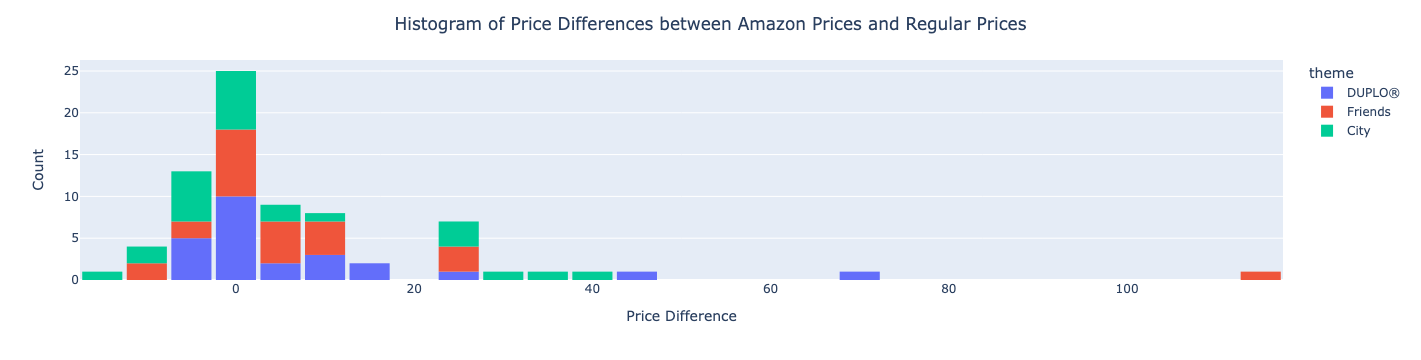

In [411]:
fig = px.histogram(DF_price,
                   nbins = 30,
                   x='price_difference',
                   color = 'theme')

fig.update_layout(bargap=0.1,
                  title='Histogram of Price Differences between Amazon Prices and Regular Prices',
                  xaxis_title = 'Price Difference',
                  yaxis_title = 'Count',
                  title_x=0.5)
fig.show()

# Problem 5

## (a) What was the most expensive set based on Retail price? Show the full data frame information for this observation. Comment on your results comparing Amazon and Retail, number of pieces or minifigs, etc.

In [314]:
DF_exp = DF.copy() 
DF_exp

,item_number,set_name,theme,pieces,price,amazon_price,year,ages,pages,minifigures,packaging,weight,unique_pieces,size
0,10859,My First Ladybird,DUPLO®,6,4.99,16.00,2018,Ages_1½-3,9,NaN,Box,NaN,5,Large
1,10860,My First Race Car,DUPLO®,6,4.99,9.45,2018,Ages_1½-3,9,NaN,Box,0.13Kg (0.29 lb),6,Large
2,10862,My First Celebration,DUPLO®,41,14.99,39.89,2018,Ages_1½-3,9,NaN,Box,NaN,18,Large
3,10864,Large Playground Brick Box,DUPLO®,71,49.99,56.69,2018,Ages_2-5,32,2.0,Plastic box,1.41Kg (3.11 lb),49,Large
4,10867,Farmers' Market,DUPLO®,26,19.99,36.99,2018,Ages_2-5,9,3.0,Box,NaN,18,Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,60251,Monster Truck,City,55,9.99,8.99,2020,Ages_5+,32,1.0,Box,0.14Kg (0.31 lb),34,Small
71,60252,Construction Bulldozer,City,126,19.99,15.99,2020,Ages_4+,84,2.0,Box,0.35Kg (0.78 lb),81,Small
72,60258,Tuning Workshop,City,897,99.99,99.99,2020,Ages_6+,389,7.0,Box,1.63Kg (3.58 lb),411,Small
73,60266,Ocean Exploration Ship,City,745,149.99,149.99,2020,Ages_7+,229,8.0,Box,2.28Kg (5.03 lb),314,Small


In [315]:
max_retail = DF_exp['price'].max()
print(f"The max retial price is ${max_retail}")

max_mask = (DF_exp['price'] >= max_retail)
DF_exp[max_mask]

The max retial price is $149.99


,item_number,set_name,theme,pieces,price,amazon_price,year,ages,pages,minifigures,packaging,weight,unique_pieces,size
73,60266,Ocean Exploration Ship,City,745,149.99,149.99,2020,Ages_7+,229,8.0,Box,2.28Kg (5.03 lb),314,Small


**The most expensive set based off of Retail price is the Lego City Ocean Exploration Ship, it has the same Retail price and Amazon price, with a high amount of pieces and minifigures that correlate with the expensive price**

## (b) What was the most expensive set based on Amazon price? Show the full data frame information for this observation.

In [316]:
max_amazon = DF_exp['amazon_price'].max()
print(f"The max amazon price is ${max_amazon}")

amazon_mask = (DF_exp['amazon_price'] >= max_amazon)
DF_exp[amazon_mask]

The max amazon price is $184.99


,item_number,set_name,theme,pieces,price,amazon_price,year,ages,pages,minifigures,packaging,weight,unique_pieces,size
28,41340,Friendship House,Friends,722,69.99,184.99,2018,Ages_6-12,164,3.0,Box,1.14Kg (2.51 lb),309,Small


**The most expensive set based off of Amazon price is the Lego Friends Friendship House.**

## (c) How many sets were above $100 on either Retail or Amazon? Show the full data frame information for these observations. Comment on any observations for these sets.

In [317]:
hunnid_mask = (DF_exp['amazon_price'] > 100) | (DF_exp['price'] > 100)
DF_exp[hunnid_mask]

,item_number,set_name,theme,pieces,price,amazon_price,year,ages,pages,minifigures,packaging,weight,unique_pieces,size
7,10875,Cargo Train,DUPLO®,105,119.99,128.95,2018,Ages_2-5,64,3.0,Box,2.86Kg (6.31 lb),68,Large
28,41340,Friendship House,Friends,722,69.99,184.99,2018,Ages_6-12,164,3.0,Box,1.14Kg (2.51 lb),309,Small
73,60266,Ocean Exploration Ship,City,745,149.99,149.99,2020,Ages_7+,229,8.0,Box,2.28Kg (5.03 lb),314,Small


**There were 3 sets above $100 dollars in either Retail or Amazon price, the Lego DUPLO set has a very low piece count in comparison to the other two sets.**

# Problem 6

## (a) On average is the price of Legos increasing, decreasing, or staying the same over the three years?

In [326]:
price_fig = px.scatter(
    DF,
    x='year',
    y='price',
    title='Does the Price increase over the 3 Years',
)

price_fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Price',
    template='plotly_white'
)

price_fig.update_xaxes(dtick=1)
price_fig.show()

In [342]:
DF_years = DF.copy() 
mask_2018 = DF_years['year'] == 2018
DF_2018 = DF_years[mask_2018]

avg_2018 = DF_2018['price'].median()

print(f"The average price for a Lego set in 2018 was ${avg_2018}")

The average price for a Lego set in 2018 was $24.99


In [343]:
mask_2019 = DF_years['year'] == 2019
DF_2019 = DF_years[mask_2019]

avg_2019 = DF_2019['price'].median()

print(f"The average price for a Lego set in 2019 was ${avg_2019}")

The average price for a Lego set in 2019 was $19.99


In [344]:
mask_2020 = DF_years['year'] == 2020
DF_2020 = DF_years[mask_2020]

avg_2020 = DF_2020['price'].median()

print(f"The average price for a Lego set in 2020 was ${avg_2020}")

The average price for a Lego set in 2020 was $29.99


**On average, the Retail price of Lego sets is staying the same over the three years or atleast is roughly in the same price range.**

## (b) On average are the number of pieces increase, decreasing, or staying the same over the three years?

In [345]:
piece_fig = px.scatter(
    DF,
    x='year',
    y='pieces',
    title='Does the Number of Pieces increase over the 3 Years',
)

piece_fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Pieces',
    template='plotly_white'
)

piece_fig.update_xaxes(dtick=1)
piece_fig.show()

In [346]:
avg_piece_2018 = DF_2018['pieces'].median()

print(f"The average pieces in a Lego set in 2018 was {avg_piece_2018}")

The average pieces in a Lego set in 2018 was 82.0


In [347]:
avg_piece_2019 = DF_2019['pieces'].median()

print(f"The average pieces in a Lego set in 2019 was {avg_piece_2019}")

The average pieces in a Lego set in 2019 was 97.0


In [348]:
avg_piece_2020 = DF_2020['pieces'].median()

print(f"The average pieces in a Lego set in 2020 was {avg_piece_2020}")

The average pieces in a Lego set in 2020 was 126.0


**On average, the number of pieces per Lego sets is increasing over the three years.**

## (c) Which set has the most minifigures and how many sets have zero or an unknown number of minifigures?

In [349]:
mask_max = DF['minifigures'] >= DF['minifigures'].max()
DF_mini[mask_max]

,item_number,set_name,theme,pieces,price,amazon_price,year,ages,pages,minifigures,packaging,weight,unique_pieces,size
56,60202,People Pack - Outdoor Adventures,City,164,39.99,69.99,2018,Ages_5-12,64,15.0,Box,0.29Kg (0.64 lb),128,Small


**The Lego City People Pack - Outdoor Adventures (item #60202) has the most minifigures, with a minifigure count of 15.**

In [350]:
DF_mini = DF.copy()
mask_na = ((DF_mini['minifigures'] == 0) | DF_mini['minifigures'].isna())
DF_mini[mask_na]

,item_number,set_name,theme,pieces,price,amazon_price,year,ages,pages,minifigures,packaging,weight,unique_pieces,size
0,10859,My First Ladybird,DUPLO®,6,4.99,16.00,2018,Ages_1½-3,9,NaN,Box,NaN,5,Large
1,10860,My First Race Car,DUPLO®,6,4.99,9.45,2018,Ages_1½-3,9,NaN,Box,0.13Kg (0.29 lb),6,Large
2,10862,My First Celebration,DUPLO®,41,14.99,39.89,2018,Ages_1½-3,9,NaN,Box,NaN,18,Large
5,10870,Farm Animals,DUPLO®,16,9.99,9.99,2018,Ages_2-5,8,NaN,Box,NaN,13,Large
10,10882,Train Tracks,DUPLO®,23,19.99,17.99,2018,Ages_2-5,16,NaN,Box,0.66Kg (1.45 lb),9,Large
11,10885,My First Fun Puzzle,DUPLO®,15,19.99,19.55,2019,Ages_1½+,9,NaN,NaN,NaN,15,Large
12,10886,My First Car Creations,DUPLO®,34,19.99,16.00,2019,Ages_1½+,10,NaN,NaN,0.64Kg (1.41 lb),31,Large
14,10904,Baby Animals,DUPLO®,9,9.99,21.11,2019,Ages_2+,8,NaN,Box,NaN,9,Large
19,10918,Tow Truck,DUPLO®,7,6.99,6.29,2020,Ages_1½+,3,NaN,Box with backing card,NaN,7,Large
29,41353,Friends Advent Calendar,Friends,500,29.99,34.00,2018,Ages_6-12,4,NaN,Box,NaN,202,Small


**10 sets have no minifigures or an unknown number of minifigures.**

# Problem 7

## I want to buy some Legos for my 6 year old cousin, which Lego set is the best deal?

In [387]:
DF_fin = DF.copy() 

In [388]:
show(DF_fin['ages'].value_counts())

Loading ITables v2.5.2 from the internet... (need help?)


In [403]:
DF_fin['price_per_piece'] = DF_fin['price']/DF_fin['pieces']
DF_fin['amz_price_per_piece'] = DF_fin['amazon_price']/DF_fin['pieces']
DF_fin['price_per_minifig'] = DF_fin['price']/DF_fin['minifigures']

In [404]:
mask_six = (DF_fin['ages'] == "Ages_6+") | (DF_fin['ages'] == "Ages_6-12") | (DF_fin['ages'] == "Ages_7+") | (DF_fin['ages'] == "Ages_5-12") | (DF_fin['ages'] == "Ages_5+")
DF_fin = DF_fin[mask_six]

In [405]:
# A good deal must include minifigures, pieces, price, amazon price
mask_deal = ['item_number', 'set_name', 'theme', 'ages', 'pieces', 'price', 'amazon_price', 'minifigures', 'price_per_piece', 'amz_price_per_piece', 'price_per_minifig']
DF_fin = DF_fin[mask_deal]

In [406]:
DF_fin['amz_ppp_cheaper'] = np.where(DF_fin['amz_price_per_piece'] < DF_fin['price_per_piece'], True, False)
DF_fin.sort_values(by="price_per_piece", ascending=True)

,item_number,set_name,theme,ages,pieces,price,amazon_price,minifigures,price_per_piece,amz_price_per_piece,price_per_minifig,amz_ppp_cheaper
29,41353,Friends Advent Calendar,Friends,Ages_6-12,500,29.99,34.00,NaN,0.059980,0.068000,NaN,False
63,60223,Harvester Transport,City,Ages_5+,358,29.99,54.80,3.0,0.083771,0.153073,9.996667,False
27,41335,Mia's Tree House,Friends,Ages_6-12,351,29.99,53.88,2.0,0.085442,0.153504,14.995000,False
39,41387,Olivia's Summer Heart Box,Friends,Ages_6+,93,7.99,7.99,2.0,0.085914,0.085914,3.995000,False
53,60182,Pickup & Caravan,City,Ages_5-12,344,29.99,65.99,3.0,0.087180,0.191831,9.996667,False
48,41427,Emma's Fashion Shop,Friends,Ages_6+,343,29.99,29.95,2.0,0.087434,0.087318,14.995000,True
36,41376,Turtles Rescue Mission,Friends,Ages_6+,225,19.99,31.27,2.0,0.088844,0.138978,9.995000,False
26,41333,Olivia's Mission Vehicle,Friends,Ages_6-12,223,19.99,45.95,1.0,0.089641,0.206054,19.990000,False
30,41356,Stephanie's Heart Box,Friends,Ages_6+,85,7.99,14.99,1.0,0.094000,0.176353,7.990000,False
31,41358,Mia's Heart Box,Friends,Ages_6+,83,7.99,18.64,1.0,0.096265,0.224578,7.990000,False


### To find the best deal for the 6-year-old cousin in question, I first determined that a "good deal" is a combination of a low price-per-piece and a high minifigure count, as these factors provide the most value and playability for a child. While both retail and Amazon prices were considered, the more stable retail price was used as the primary metric, since Amazon prices can fluctuate and be significantly inflated. After filtering the data to include only sets appropriate for ages six and up, my analysis shows that the Lego City Pickup & Caravan (item #60182) is the best purchase.This set stands out because it has one of the lowest price-per-piece ratios in its age category and includes three minifigures, offering great value. The most compelling evidence is the price difference: its retail price is only 29.99 (dollars), while its Amazon price is 65.99 (dollars). This significant markup on Amazon highlights what an excellent deal the set is when purchased at its original retail price, making it the ideal choice.